# NLTK vs BERT: Is there a significant difference in the performances of the models on English and Spanish text?

### Research idea:
- We are addressing the problem “Is BERT more accurate than NLTK at determining the sentiment of English and Spanish reviews”. There seems to be limited literature and documentation on the difference in NLP models NLTK and BERT’s abilities to correctly analyze the sentiment of text in Spanish and English. So, answering this question will give us insights into the potential strengths and weaknesses of BERT and NLTK at predicting sentiment. As a result, we may have an idea of which NLP model to use depending on the given language.

### Dataset:
- The dataset we are using is titled “IMDB Dataset of 50K Movie Reviews (Spanish)”(Fig. 1), which is open and available on Kaggle. The dataset includes 50,000 IMDB movie reviews in English, the Spanish translation, and the sentiment of the review. The Kaggle dataset is based on an original dataset from the paper Learning Word Vectors for Sentiment Analysis (L. Mass et al) which includes only the English reviews with the associated sentiment. The dataset contains 50,000 movie reviews with an equal number of positive and negative reviews. Sentiment labels were determined by the score of the review: a negative review had a score less than or equal to 4 out of 10 and a positive review had a score greater than or equal to 7 out of 10. To get the spanish translations for the reviews, the Googletrans python library which uses the Google Translate API was applied.  Furthermore, we plan on using the movie reviews as input for the NLTK and BERT models to acquire the sentiment analysis for each model individually.
- Link to the dataset: https://www.kaggle.com/datasets/luisdiegofv97/imdb-dataset-of-50k-movie-reviews-spanish

### Previous analysis on this data:
- There have been previous analyses performed on similar datasets. Since the internet evolved to be a shared space for users all over the world, statistical analysis of language sentiment through the usage of algorithms has been a heated topic, as efficient understanding of either user-reviews or comment in different languages can be beneficial for marketing, customer service, or overall online environment improvements. For example, Grader et al. utilized a different type of language model, MLSLDA, for sentiment analysis on a dataframe that contains German and English movie reviews to understand its performance when dealing with multilingual data. Similarly, Ozturk et al., trained a Rsentiment model to process Turkish tweets about the Syrian war and compared the result to that of the English tweets, which yielded interesting results that showed interesting polarizing opinions between the 2 countries about the war. These studies inspired us to compare the performance of more efficient language processing models such as NLTK and BERT on different languages.



___

## NLTK for English and Spanish text
- NLTK’s sentiment intensity analyzer is a tool fine tuned to read and predict the sentiment of a sentence, based on the words in it. It's a rule based and deterministic model built on bag of words representation of tokens in a sentence. It returns a value between -1 and 1, -1 corresponding to a highly negative sentence, and 1 corresponding to a highly positive one. For the sake of simplicity and consistency, we classified any number <= 0 to be a negative sentence, and > 0 to be a positive one. For instance, if a sentence has more “positive words”, i.e, “happy” or “good”, it would most likely be predicted to be a positive statement, and a sentence with more words such as “hate” and “detest” to be negative. 

In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

#### Function to use the the sentiment intensity analyzer from NLTK:

In [10]:
def score_discrete(score):
    if score <= 0:
        return -1
    elif score > 0:
        return 1
    
def sentiment_analysis(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

In [11]:
df_eng_span = pd.read_csv('test_df.csv', encoding='utf8')
df_eng_span.head()

,Unnamed: 0,review_en,review_es,sentiment
0,40548,As a Spanish tourist in Los Angeles and a fana...,Como turista español en Los Ángeles y un amant...,negative
1,25110,Excellent movie about a big media firm and the...,Excelente película sobre una gran firma de med...,positive
2,25040,"As someone else has already said here, every s...","Como alguien más ya ha dicho aquí, cada escena...",positive
3,23051,"Of all movies (and I'm a film graduate, if tha...",De todas las películas (y soy un graduado de c...,negative
4,14182,This is the second Eytan Fox film I have seen....,Esta es la segunda película de Eytan Fox que h...,positive


#### change positve and negative to 1 and 0

In [12]:
df_eng_span['sentiment'] = df_eng_span['sentiment'].replace({'positive' : 1, 'negative' : -1})
df_eng_span.head()

,Unnamed: 0,review_en,review_es,sentiment
0,40548,As a Spanish tourist in Los Angeles and a fana...,Como turista español en Los Ángeles y un amant...,-1
1,25110,Excellent movie about a big media firm and the...,Excelente película sobre una gran firma de med...,1
2,25040,"As someone else has already said here, every s...","Como alguien más ya ha dicho aquí, cada escena...",1
3,23051,"Of all movies (and I'm a film graduate, if tha...",De todas las películas (y soy un graduado de c...,-1
4,14182,This is the second Eytan Fox film I have seen....,Esta es la segunda película de Eytan Fox que h...,1


#### take a random sample of size n

In [13]:
df_nltk_sample = df_eng_span.sample(n=1000, replace = True)

In [17]:
#import nltk
#nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/svyasabattu/nltk_data...


True

#### applying nltk to english reviews

In [18]:
df_nltk_sample['nltk_score_eng'] = df_nltk_sample['review_en'].apply(sentiment_analysis)
df_nltk_sample['nltk_score_eng_discrete'] = df_nltk_sample['nltk_score_eng'].apply(score_discrete)

df_nltk_sample.head()

,Unnamed: 0,review_en,review_es,sentiment,nltk_score_eng,nltk_score_eng_discrete
14,15046,I saw this movie one time at a kiddie matinée ...,Vi una vez en la película una vez en un Kiddie...,-1,0.9789,1
28,39616,It must be a long time ago that I have seen su...,Debe pasar hace mucho tiempo que he visto una ...,-1,-0.9654,-1
35,22706,This is truly terrible: painfully irritating s...,Esto es verdaderamente terrible: los artistas ...,-1,-0.9531,-1
38,37835,"First off, I would like to point out that whil...","En primer lugar, me gustaría señalar que, si b...",-1,0.4506,1
2,25040,"As someone else has already said here, every s...","Como alguien más ya ha dicho aquí, cada escena...",1,0.9817,1


#### applying nltk to spanish reviews

In [19]:
#applying nltk to spanish reviews
df_nltk_sample['nltk_score_es'] = df_nltk_sample['review_es'].apply(sentiment_analysis)
df_nltk_sample['nltk_score_es_discrete'] = df_nltk_sample['nltk_score_es'].apply(score_discrete)

df_nltk_sample.head()

,Unnamed: 0,review_en,review_es,sentiment,nltk_score_eng,nltk_score_eng_discrete,nltk_score_es,nltk_score_es_discrete
14,15046,I saw this movie one time at a kiddie matinée ...,Vi una vez en la película una vez en un Kiddie...,-1,0.9789,1,-0.6369,-1
28,39616,It must be a long time ago that I have seen su...,Debe pasar hace mucho tiempo que he visto una ...,-1,-0.9654,-1,-0.7845,-1
35,22706,This is truly terrible: painfully irritating s...,Esto es verdaderamente terrible: los artistas ...,-1,-0.9531,-1,-0.9571,-1
38,37835,"First off, I would like to point out that whil...","En primer lugar, me gustaría señalar que, si b...",-1,0.4506,1,-0.8402,-1
2,25040,"As someone else has already said here, every s...","Como alguien más ya ha dicho aquí, cada escena...",1,0.9817,1,0.8750,1


#### compute accuracy

In [20]:
en_accuracy = df_nltk_sample[df_nltk_sample["nltk_score_eng_discrete"] == df_nltk_sample["sentiment"]].shape[0]/df_nltk_sample.shape[0]

es_accuracy = df_nltk_sample[df_nltk_sample["nltk_score_es_discrete"] == df_nltk_sample["sentiment"]].shape[0]/df_nltk_sample.shape[0]

In [21]:
en_accuracy

0.668

In [22]:
es_accuracy

0.678

In [23]:
def case_sorter(score, binary_nltk_score):
    if score == 1 and binary_nltk_score == 1:
         return 'true positive'
    elif score == 1 and binary_nltk_score == -1:
         return 'false negative'
    elif score == -1 and binary_nltk_score == 1:
         return 'false positive'
    else:
         return 'true negative'

#### check english accuracy

<AxesSubplot:xlabel='score_compared', ylabel='count'>

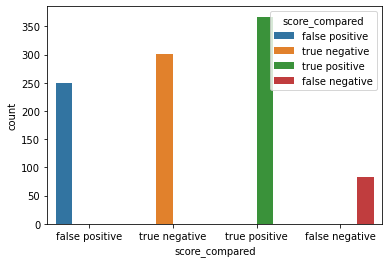

In [24]:
score_counts = pd.DataFrame({'score_compared' : pd.Series(df_nltk_sample.apply(lambda row: case_sorter(row['sentiment'], row['nltk_score_eng_discrete']), axis=1))})
sns.countplot(data = score_counts, x = 'score_compared', hue = 'score_compared')

#### check spanish accuracy

<AxesSubplot:xlabel='score_compared', ylabel='count'>

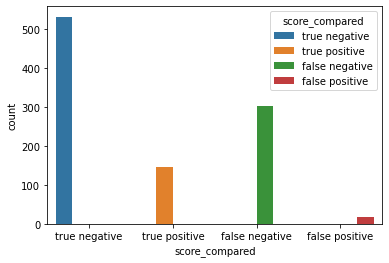

In [25]:
score_counts = pd.DataFrame({'score_compared' : pd.Series(
    df_nltk_sample.apply(lambda row: case_sorter(row['sentiment'], row['nltk_score_es_discrete']), axis=1))})
sns.countplot(data = score_counts, x = 'score_compared', hue = 'score_compared')

In [26]:
df_eng_span.head()

,Unnamed: 0,review_en,review_es,sentiment
0,40548,As a Spanish tourist in Los Angeles and a fana...,Como turista español en Los Ángeles y un amant...,-1
1,25110,Excellent movie about a big media firm and the...,Excelente película sobre una gran firma de med...,1
2,25040,"As someone else has already said here, every s...","Como alguien más ya ha dicho aquí, cada escena...",1
3,23051,"Of all movies (and I'm a film graduate, if tha...",De todas las películas (y soy un graduado de c...,-1
4,14182,This is the second Eytan Fox film I have seen....,Esta es la segunda película de Eytan Fox que h...,1


In [27]:
df_nltk_sample = df_eng_span.sample(n=1000, replace = True)

#### applying nltk to english reviews

In [28]:
df_nltk_sample['nltk_score_eng'] = df_nltk_sample['review_en'].apply(sentiment_analysis)
df_nltk_sample['nltk_score_eng_discrete'] = df_nltk_sample['nltk_score_eng'].apply(score_discrete)

df_nltk_sample.head()

,Unnamed: 0,review_en,review_es,sentiment,nltk_score_eng,nltk_score_eng_discrete
16,35585,"Ti%s and As*, lots of boobies. Some great char...","TI% S y AS *, muchos piqueros.Algunos grandes ...",1,0.9897,1
4,14182,This is the second Eytan Fox film I have seen....,Esta es la segunda película de Eytan Fox que h...,1,0.7552,1
35,22706,This is truly terrible: painfully irritating s...,Esto es verdaderamente terrible: los artistas ...,-1,-0.9531,-1
31,1943,I saw The Merchant of Venice in London last we...,Vi al comerciante de Venecia en Londres la sem...,1,0.8770,1
8,29180,"A friend of mine decided to rent this thing, l...","Un amigo mío decidió alquilar esta cosa, suert...",-1,-0.9579,-1


#### applying nltk to spanish reviews

In [29]:
df_nltk_sample['nltk_score_es'] = df_nltk_sample['review_es'].apply(sentiment_analysis)
df_nltk_sample['nltk_score_es_discrete'] = df_nltk_sample['nltk_score_es'].apply(score_discrete)

df_nltk_sample.head()

,Unnamed: 0,review_en,review_es,sentiment,nltk_score_eng,nltk_score_eng_discrete,nltk_score_es,nltk_score_es_discrete
16,35585,"Ti%s and As*, lots of boobies. Some great char...","TI% S y AS *, muchos piqueros.Algunos grandes ...",1,0.9897,1,0.3612,1
4,14182,This is the second Eytan Fox film I have seen....,Esta es la segunda película de Eytan Fox que h...,1,0.7552,1,-0.8807,-1
35,22706,This is truly terrible: painfully irritating s...,Esto es verdaderamente terrible: los artistas ...,-1,-0.9531,-1,-0.9571,-1
31,1943,I saw The Merchant of Venice in London last we...,Vi al comerciante de Venecia en Londres la sem...,1,0.8770,1,0.3400,1
8,29180,"A friend of mine decided to rent this thing, l...","Un amigo mío decidió alquilar esta cosa, suert...",-1,-0.9579,-1,-0.4215,-1


#### Based on the plot below, nltk seems to assign more positive ratings to english than spanish, and there seems to be more neutral scores for spanish. there is a higher density of scores at the extremes close to -1 and 1 than in the center

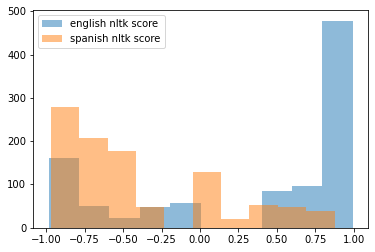

In [30]:
plt.hist(df_nltk_sample['nltk_score_eng'], alpha = 0.5, label = 'english nltk score')
plt.hist(df_nltk_sample['nltk_score_es'], alpha = 0.5, label = 'spanish nltk score')
plt.legend()
plt.show()

#### Permutating 15 tests to get a distribution for NLTK's accuracy on english text:

In [31]:
# run nltk on 15 samples of size 1000

nltk_en_values = []
for i in range(15):
    df_nltk_sample = df_eng_span.sample(n=1000, replace = True)
    df_nltk_sample['nltk_score_en'] = df_nltk_sample['review_en'].apply(sentiment_analysis)
    df_nltk_sample['nltk_score_en_discrete'] = df_nltk_sample['nltk_score_en'].apply(score_discrete)
    acc = df_nltk_sample.query('sentiment == nltk_score_en_discrete').shape[0]/df_nltk_sample.shape[0]
    nltk_en_values.append(acc)

#### Distribution of NLTK's accuracy on sentimental analysis of english text:

In [32]:
nltk_en_values

[0.707,
 0.694,
 0.722,
 0.7,
 0.692,
 0.698,
 0.702,
 0.711,
 0.717,
 0.684,
 0.712,
 0.71,
 0.702,
 0.697,
 0.717]

#### Permutating 15 tests to get a distribution for NLTK's accuracy on spanish text:

In [33]:
nltk_es_values = []
for i in range(15):
    df_nltk_sample = df_eng_span.sample(n=1000, replace = True)
    df_nltk_sample['nltk_score_es'] = df_nltk_sample['review_es'].apply(sentiment_analysis)
    df_nltk_sample['nltk_score_es_discrete'] = df_nltk_sample['nltk_score_es'].apply(score_discrete)
    acc = df_nltk_sample.query('sentiment == nltk_score_es_discrete').shape[0]/df_nltk_sample.shape[0]
    nltk_es_values.append(acc)

#### Distribution of NLTK's accuracy on sentimental analysis of spanish text:

In [34]:
nltk_es_values

[0.647,
 0.634,
 0.654,
 0.644,
 0.633,
 0.651,
 0.634,
 0.648,
 0.653,
 0.663,
 0.653,
 0.634,
 0.68,
 0.677,
 0.653]

___